In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class space():
    def __init__(self, N, dim, T):
        self.N = N
        self.dim = dim
        self.grid = np.zeros([N]*dim)
        self.T = T
    
    def step(self):
        step_matrix = np.zeros([self.N]*self.dim)
        for index, value in np.ndenumerate(self.grid):
            count = 0
            for i, k in enumerate(index):
                index_up = np.array(index)
                index_up[i] += 1
                if index_up[i] == self.N:
                    index_up[i] = 0
                index_down = np.array(index)
                index_down[i] += -1
                if index_down[i] < 0:
                    index_down[i] = self.N-1 
                if self.grid[tuple(index_up)] != self.grid[index]:
                    count += 1 
                if self.grid[tuple(index_down)] != self.grid[index]:
                    count += 1
            if np.random.uniform(0, 1) < np.exp(-float(count)/(self.T*2.0*float(self.dim))):
                step_matrix[index] = 1
        (self.grid+step_matrix)%2
        


In [3]:
s = space(40, 2, 10.0)
s.grid = np.random.binomial(1, 0.5, size=[s.N]*s.dim)

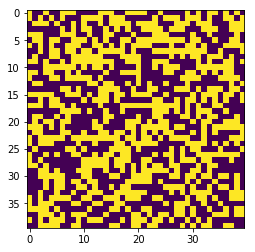

In [5]:
for t in range(1000):
    s.step()
plt.imshow(s.grid)
plt.show()